In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Cell 2: Load the data
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
# Calculate headline length statistics
df['headline_length'] = df['headline'].str.len()
headline_stats = df['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [7]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


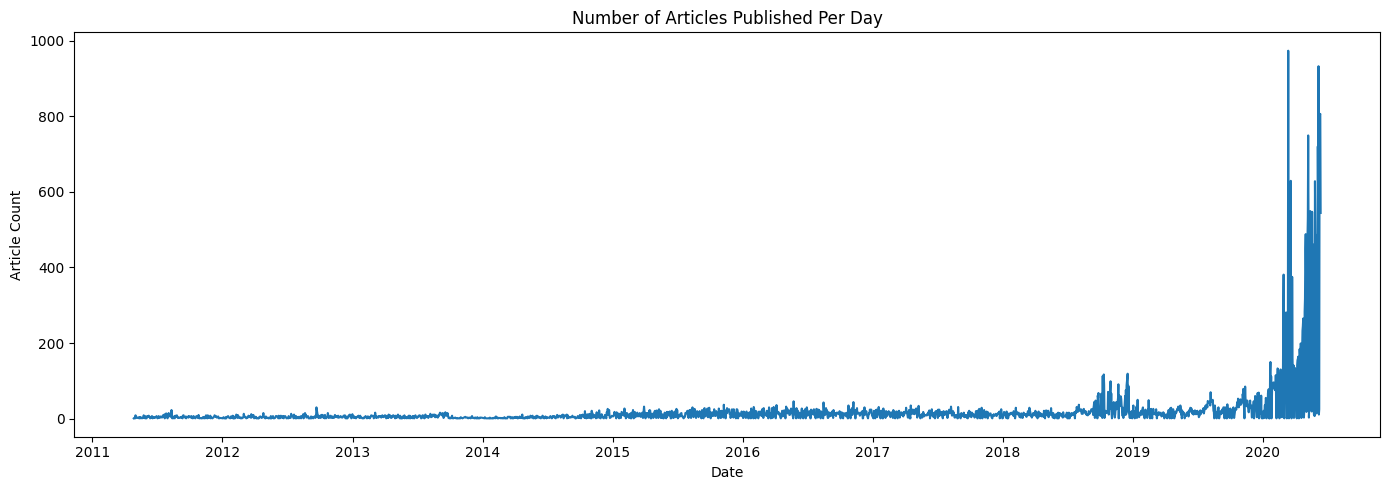

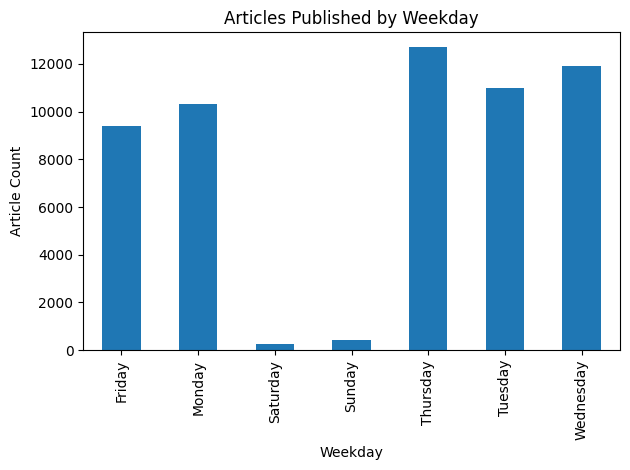

In [ ]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract date (without time) and weekday
df['date_only'] = df['date'].dt.date
df['weekday'] = df['date'].dt.day_name()

# Count articles per day
articles_per_day = df.groupby('date_only').size()

# Plot articles per day (trend over time)


plt.figure(figsize=(14, 5))
articles_per_day.plot()
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.tight_layout()
plt.show()

# Analyze articles by weekday
weekday_counts = df['weekday'].value_counts().sort_index()
weekday_counts.plot(kind='bar')
plt.title('Articles Published by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Article Count')
plt.tight_layout()
plt.show()

In [ ]:
# identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams, FreqDist

# Download NLTK resources if not already present
nltk.download('punkt', quiet=True, force=True)
nltk.download('punkt_tab', quiet=True, force=True)
nltk.download('stopwords', quiet=True, force=True)

# Combine all headlines into a single text
all_headlines = ' '.join(df['headline'].dropna().astype(str))

# Tokenize and clean
tokens = word_tokenize(all_headlines.lower())
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get most common keywords (unigrams)
fdist = FreqDist(tokens)
print("Most common keywords:")
print(fdist.most_common(20))

# Get most common bigrams (phrases)
bigrams = ngrams(tokens, 2)
bigram_fdist = FreqDist(bigrams)
print("\nMost common bigrams (phrases):")
for phrase, count in bigram_fdist.most_common(20):
    print(' '.join(phrase), ":", count)

Most common keywords:
[('stocks', 161702), ('vs', 138833), ('eps', 128801), ('est', 122289), ('shares', 114140), ('reports', 108688), ('update', 91645), ('market', 91080), ('earnings', 87183), ('sales', 79528), ('top', 78493), ('benzinga', 74466), ('pt', 73059), ('announces', 66531), ('price', 64217), ('buy', 63927), ('downgrades', 61942), ('trading', 61146), ('raises', 57793), ('upgrades', 56802)]

Most common bigrams (phrases):
vs est : 98090
eps vs : 58657
reports eps : 51654
price target : 47264
benzinga top : 44259
stocks moving : 40038
market update : 33159
earnings scheduled : 32054
sales vs : 29280
initiates coverage : 28981
raises pt : 27266
shares several : 24078
companies trading : 23159
trading higher : 22935
adj eps : 21708
top upgrades : 21111
trading lower : 20096
stocks hit : 20016
option alert : 18226
biggest movers : 17806
